In [1]:
import numpy as np
from preprocessor import Preprocessor
from pdf_reader import PDFReader
from vectorizer import Vectorizer
from document_clustering import DocumentClustering
from sklearn.cluster import KMeans

Processing files: 100%|██████████|


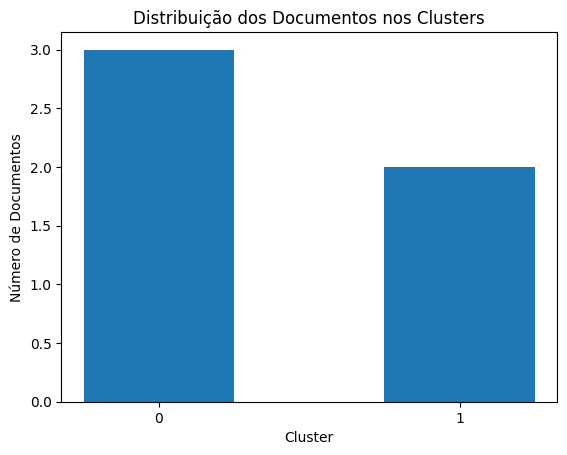

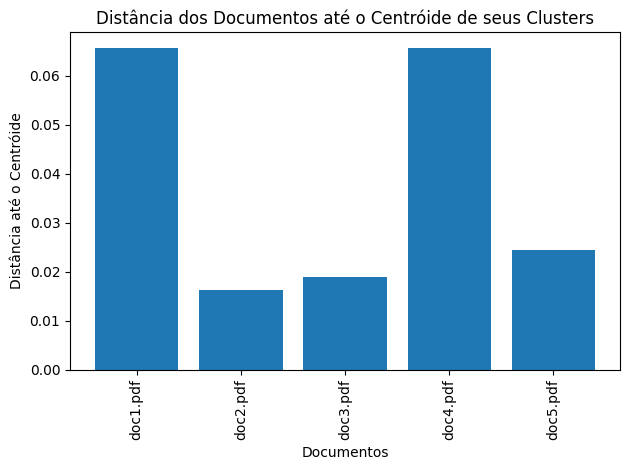

In [2]:
# Initialize classes
preprocessor = Preprocessor()
vectorizer = Vectorizer("cbow_s50.txt")
pdf_reader = PDFReader()
doc_cluster = DocumentClustering(pdf_reader, preprocessor)

# Paths to the documents
doc_paths = ["doc1.pdf", "doc2.pdf", "doc3.pdf", "doc4.pdf", "doc5.pdf"]

# Extract and preprocess the template documents
processed_docs = doc_cluster.extract_and_preprocess(doc_paths)

# Convert processed documents in vectors
doc_vectors = [vectorizer.calculate_document_vector(doc) for doc in processed_docs]

# Run KMeans
k = 2
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42).fit(doc_vectors)
labels = kmeans.labels_

# Visualizing the cluster distribution
doc_cluster.visualize_clusters_distribution(labels, k)

# Calculating the distances to the centroid
distances_to_centroid = []
for i, doc_vec in enumerate(doc_vectors):
    centroid = kmeans.cluster_centers_[labels[i]]
    distance = np.linalg.norm(doc_vec - centroid)
    distances_to_centroid.append(distance)

# Visualizing the distances to the centroid
doc_cluster.visualize_distances_to_centroid(doc_paths, distances_to_centroid)